## Data Sources:
- Memory Alpha for Metadata & Summaries
- Chakoteya.com for Lines

* Datasets
    - episode list w/ metadata
        | Series | Seasons | Episodes | Originally released | In Dataset |
        | :----: | :----: | :----: | :----: | :----: |
    - episode lines joined to transcript w/o characters w/ metadata
        | Series | Seasons | Episodes | Originally released | In Dataset |
        | :----: | :----: | :----: | :----: | :----: |
    - episode lines w/ characters & metadata
        | Series | Seasons | Episodes | Originally released | In Dataset |
        | :----: | :----: | :----: | :----: | :----: |
    - episode summaries w/ metadata
        | Series | Seasons | Episodes | Originally released | In Dataset |
        | :----: | :----: | :----: | :----: | :----: |

Resources:  
- [stackoverflow - Detecting header in HTML tables using beautifulsoup / lxml when table lacks thead element](https://stackoverflow.com/questions/45292001/detecting-header-in-html-tables-using-beautifulsoup-lxml-when-table-lacks-thea)
- [stackoverflow - Scrape tables into dataframe with BeautifulSoup](https://stackoverflow.com/questions/50633050/scrape-tables-into-dataframe-with-beautifulsoup)

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from collections import defaultdict
import pandas as pd

import missingno as msno # missing data visualisation
%matplotlib inline

# 1. Episode Lists & Metadata

In [2]:
# Memory Alpha Star Trek root url
root_url = "https://memory-alpha.fandom.com/wiki/Star_Trek:_"

# List of series names
series_names = ["The Original Series", "The Animated Series", "The Next Generation", "Deep Space Nine",
        "Voyager", "Enterprise", "Discovery", "Picard ", "Lower Decks"]

In [3]:
# Create dictionary with Series Abbreviations as keys
# and lists of HTML tables containing episode lists and metadata
# as values

episodes_tbl_dict = defaultdict(dict)

for i, name in enumerate(series_names):
    # create link to series main page
    name = name.replace(' ', '_')
    url = root_url + name
    # get page content
    website_url = requests.get(url).text
    soup = BeautifulSoup(website_url, 'lxml')
    # get series abbreviation
    abbr = soup.find("aside", {"class": "portable-infobox"}) \
        .find("div", {"data-source": "abbr"}) \
        .find("div", {"class": "pi-data-value"}).get_text(strip=True)
    abbr = re.sub('[^A-Za-z0-9]+', '', abbr)
    
    page_url = root_url + name
    
    # Scrape main page for each series
    series_page_url = requests.get(page_url).text
    soup = BeautifulSoup(series_page_url, 'html.parser')

    # get episodes table
    tables = soup.find_all("table", {"class": "grey sortable"})
    episodes_tbl_dict[abbr] = tables
    
    print(series_names[i], " done...")

The Original Series  done...
The Animated Series  done...
The Next Generation  done...
Deep Space Nine  done...
Voyager  done...
Enterprise  done...
Discovery  done...
Picard   done...
Lower Decks  done...


In [15]:
episodes_tbl_dict

defaultdict(dict,
            {'TOS': [<table class="grey sortable" width="100%">
              <tbody><tr>
              <th width="29%">Title
              </th>
              <th width="5%">Episode
              </th>
              <th width="10%">Prodno.
              </th>
              <th width="13%">Stardate
              </th>
              <th width="11%">Original Airdate
              </th>
              <th width="10%">Remastered Airdate
              </th></tr>
              <tr>
              <td><a href="/wiki/The_Cage_(episode)" title="The Cage (episode)">The Cage</a></td>
              <td>0x01</td>
              <td>6149-01</td>
              <td><i>Unknown</i></td>
              <td><a href="/wiki/1988_(production)" title="1988 (production)">1988</a>-<a href="/wiki/4_October" title="4 October">10-04</a></td>
              <td><a href="/wiki/2009_(production)" title="2009 (production)">2009</a>-<a href="/wiki/2_May" title="2 May">05-02</a>
              </td></tr></tb

In [6]:
pd.read_html(str(episodes_tbl_dict['TOS'][2]))[0]

,Title,Episode,Prodno.,Stardate,Original Airdate,Remastered Airdate
0,Catspaw,2x01,60330,3018.2,1967-10-27,2006-10-28
1,Metamorphosis,2x02,60331,3219.8 - 3220.3,1967-11-10,2007-11-03
2,Friday's Child,2x03,60332,3497.2 - 3499.1,1967-12-01,2007-01-06
3,Who Mourns for Adonais?,2x04,60333,3468.1,1967-09-22,2008-01-12
4,Amok Time,2x05,60334,3372.7,1967-09-15,2007-02-17
5,The Doomsday Machine,2x06,60335,4202.9,1967-10-20,2007-02-10
6,Wolf in the Fold,2x07,60336,3614.9 - 3615.4,1967-12-22,2007-03-10
7,The Changeling,2x08,60337,3541.9,1967-09-29,2008-02-02
8,The Apple,2x09,60338,3715.0 - 3715.6,1967-10-13,2008-03-01
9,"Mirror, Mirror",2x10,60339,Unknown,1967-10-06,2006-11-11


In [7]:
episodes_tbl_dict.keys()

dict_keys(['TOS', 'TAS', 'TNG', 'DS9', 'VOY', 'ENT', 'DIS', 'PIC', 'LD'])

In [29]:
# Make a list of dataframes from the episode list dictionary.
# Create a new column and assign the series abbreviation to each row.
# Some tables have additional subgrouping within the tables.
# These were read as Multi-index rows and need to be removed.

dfs_list = []

for key, value in episodes_tbl_dict.items():
    tables = value
    episodes_tbls = episodes_tbl_dict[key]
    
    for i, table in enumerate(episodes_tbls):
        pd_table = pd.read_html(str(table))[0]
        # if df has a second index level, e.g. chapters in Discovery series
        if isinstance(pd_table.index, pd.MultiIndex):
            pd_table.columns = pd_table.columns.droplevel(1)
        else:
            pass
        pd_table['Abbr.'] = key
        dfs_list.append(pd_table)

In [30]:
dfs_list

[      Title Episode  Prodno. Stardate Original Airdate Remastered Airdate  \
 0  The Cage    0x01  6149-01  Unknown       1988-10-04         2009-05-02   
 
   Abbr.  
 0   TOS  ,
                               Title Episode   Prodno.         Stardate  \
 0      Where No Man Has Gone Before    1x01   6149-02  1312.4 - 1313.8   
 1            The Corbomite Maneuver    1x02   6149-03  1512.2 - 1514.1   
 2                      Mudd's Women    1x03   6149-04  1329.8 - 1330.1   
 3                  The Enemy Within    1x04   6149-05  1672.1 - 1673.1   
 4                      The Man Trap    1x05   6149-06  1513.1 - 1513.8   
 5                    The Naked Time    1x06   6149-07  1704.2 - 1704.4   
 6                         Charlie X    1x07   6149-08  1533.6 - 1535.8   
 7                 Balance of Terror    1x08   6149-09  1709.2 - 1709.6   
 8    What Are Little Girls Made Of?    1x09   6149-10           2712.4   
 9                Dagger of the Mind    1x10   6149-11  2715.1 - 2715

In [31]:
# Combine dataframe lists to one dataframe.
# Index needs to be reset, so it's contiuous throughout the dataset.

# Combine dataframes
combined_dfs = pd.concat(dfs_list)

# Reset index
combined_dfs.reset_index(drop=True, inplace=True)

In [32]:
print("Number of rows: ", combined_dfs.shape[0])
print("Number of columns: ", combined_dfs.shape[1])

Number of rows:  791
Number of columns:  16


In [33]:
combined_dfs.columns

Index([                            'Abbr.',
                             ('Abbr.', ''),
                                    'Date',
                                 'Episode',
                ('Episode', 'Chapter One'),
                        'Original Airdate',
                        'Original airdate',
       ('Original Airdate', 'Chapter One'),
                                 'Prodno.',
                       'Production number',
                ('Prodno.', 'Chapter One'),
                      'Remastered Airdate',
                                'Stardate',
               ('Stardate', 'Chapter One'),
                                   'Title',
                  ('Title', 'Chapter One')],
      dtype='object')

In [35]:
# Rename duplicate columns

combined_dfs.rename(columns={'Abbr.': 'Abbr_1'}, inplace = True)

combined_dfs.rename(columns=''.join, inplace=True)

combined_dfs.columns = combined_dfs.columns.str.strip().str.replace(' ', '_')

## Clean up Dataframe

In [39]:
combined_dfs.head()

,Abbr_1,Abbr.,Date,Episode,EpisodeChapter_One,Original_Airdate,Original_airdate,Original_AirdateChapter_One,Prodno.,Production_number,Prodno.Chapter_One,Remastered_Airdate,Stardate,StardateChapter_One,Title,TitleChapter_One
0,TOS,NaN,NaN,0x01,NaN,1988-10-04,NaN,NaN,6149-01,NaN,NaN,2009-05-02,Unknown,NaN,The Cage,NaN
1,TOS,NaN,NaN,1x01,NaN,1966-09-22,NaN,NaN,6149-02,NaN,NaN,2007-01-20,1312.4 - 1313.8,NaN,Where No Man Has Gone Before,NaN
2,TOS,NaN,NaN,1x02,NaN,1966-11-10,NaN,NaN,6149-03,NaN,NaN,2006-12-09,1512.2 - 1514.1,NaN,The Corbomite Maneuver,NaN
3,TOS,NaN,NaN,1x03,NaN,1966-10-13,NaN,NaN,6149-04,NaN,NaN,2008-04-26,1329.8 - 1330.1,NaN,Mudd's Women,NaN
4,TOS,NaN,NaN,1x04,NaN,1966-10-06,NaN,NaN,6149-05,NaN,NaN,2008-01-26,1672.1 - 1673.1,NaN,The Enemy Within,NaN


In [37]:
# Check for missing data
combined_dfs.isna().sum()

Abbr_1                          16
Abbr.                          775
Date                           694
Episode                         16
EpisodeChapter_One             775
Original_Airdate               113
Original_airdate               694
Original_AirdateChapter_One    775
Prodno.                        113
Production_number              694
Prodno.Chapter_One             775
Remastered_Airdate             711
Stardate                       113
StardateChapter_One            775
Title                           16
TitleChapter_One               775
dtype: int64

<AxesSubplot:>

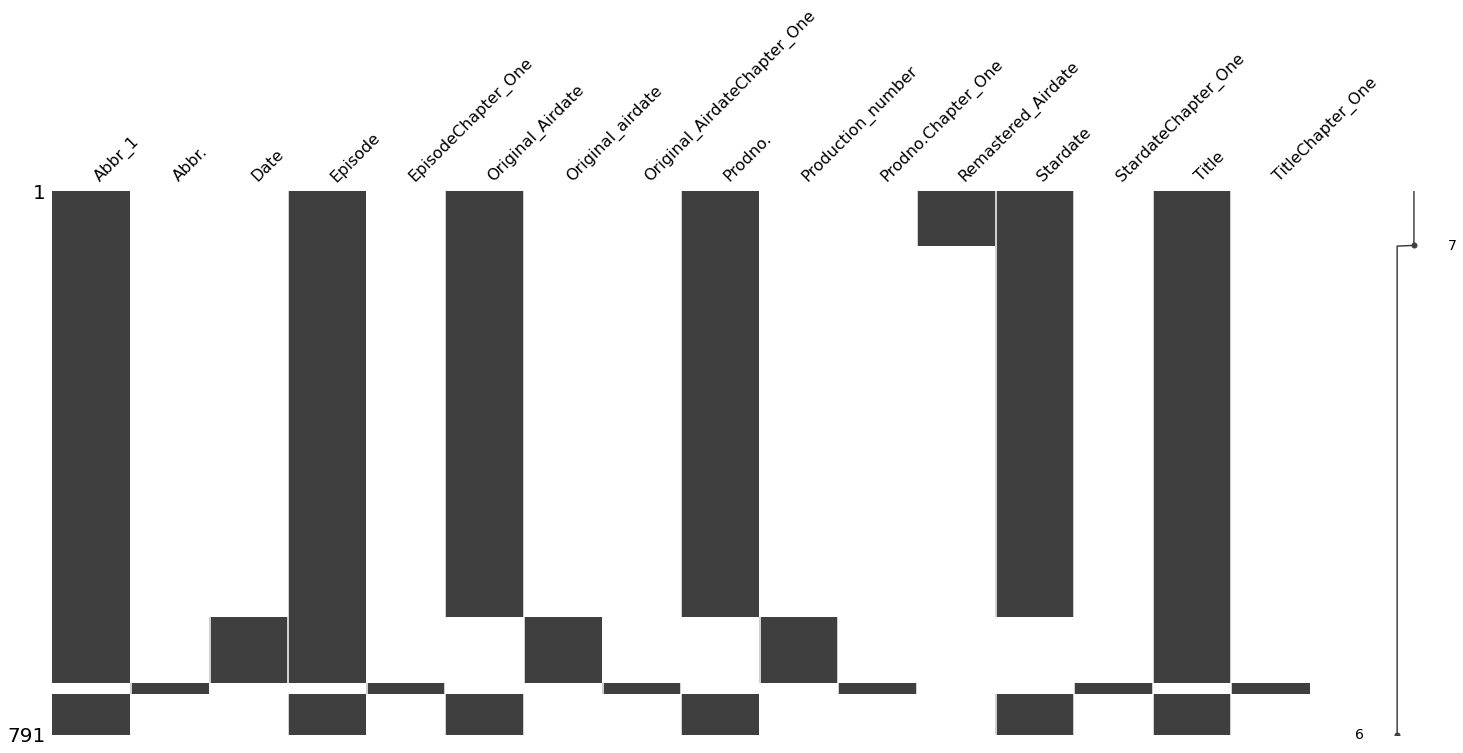

In [38]:
# Check structure of missing data
msno.matrix(combined_dfs)

In [40]:
# Columns have different names but contain same info due to MultiIndexing.
# Combine info from the respective columns.

# Define functions for combining two or three columns
def combine_two_cols(a, b):
    result = ''
    if pd.isnull(a):
        result = b   
    else:
        result = a
    return result

def combine_three_cols(a, b, c):
    result = ''
    if pd.isnull(a):
        if pd.isnull(b):
            return c
        else:
            return b
    else:
        result = a
    return result

In [41]:
# clean up episode ids
combined_dfs['episode'] = combined_dfs.apply(lambda row : combine_two_cols(row['Episode'], \
                                                row["EpisodeChapter_One"]), axis = 1)

# clean up episode titles
combined_dfs['title'] = combined_dfs.apply(lambda row : combine_two_cols(row['Title'], \
                                                row["TitleChapter_One"]), axis = 1)

# clean up series abbreviations
combined_dfs['abbr'] = combined_dfs.apply(lambda row : combine_two_cols(row['Abbr_1'], \
                                                row["Abbr."]), axis = 1)

# clean up stardates
combined_dfs['stardate'] = combined_dfs.apply(lambda row : combine_three_cols(row['Stardate'], \
                                                row["StardateChapter_One"], row['Date']), axis = 1)

# clean up original airdate
combined_dfs['original_airdate'] = combined_dfs.apply(lambda row : combine_three_cols(row['Original_Airdate'], \
                                                row["Original_airdate"], row['Original_AirdateChapter_One']), \
                                                      axis = 1)

# clean up production number
combined_dfs['production_number'] = combined_dfs.apply(lambda row : combine_three_cols(row['Prodno.'], \
                                                row["Production_number"], row['Prodno.Chapter_One']), \
                                                      axis = 1)

In [42]:
# drop unnecessary columns
cols_to_drop = ['Abbr_1', 'Abbr.', 'Date', 'Episode', 'EpisodeChapter_One',
       'Original_Airdate', 'Original_airdate', 'Original_AirdateChapter_One',
       'Prodno.', 'Production_number', 'Prodno.Chapter_One',
       'Remastered_Airdate', 'Stardate', 'StardateChapter_One', 'Title',
       'TitleChapter_One']

st_metadata_df = combined_dfs.drop(cols_to_drop, axis=1)

In [43]:
st_metadata_df.head()

,episode,title,abbr,stardate,original_airdate,production_number
0,0x01,The Cage,TOS,Unknown,1988-10-04,6149-01
1,1x01,Where No Man Has Gone Before,TOS,1312.4 - 1313.8,1966-09-22,6149-02
2,1x02,The Corbomite Maneuver,TOS,1512.2 - 1514.1,1966-11-10,6149-03
3,1x03,Mudd's Women,TOS,1329.8 - 1330.1,1966-10-13,6149-04
4,1x04,The Enemy Within,TOS,1672.1 - 1673.1,1966-10-06,6149-05


In [44]:
# Dimensions of final Dataframe
st_metadata_df.shape

(791, 6)

In [46]:
# Check for missing data
st_metadata_df.isna().sum()

episode              0
title                0
abbr                 0
stardate             0
original_airdate     0
production_number    0
dtype: int64

# 2. Episode Summaries

In [47]:
episodes_tbl_dict

defaultdict(dict,
            {'TOS': [<table class="grey sortable" width="100%">
              <tbody><tr>
              <th width="29%">Title
              </th>
              <th width="5%">Episode
              </th>
              <th width="10%">Prodno.
              </th>
              <th width="13%">Stardate
              </th>
              <th width="11%">Original Airdate
              </th>
              <th width="10%">Remastered Airdate
              </th></tr>
              <tr>
              <td><a href="/wiki/The_Cage_(episode)" title="The Cage (episode)">The Cage</a></td>
              <td>0x01</td>
              <td>6149-01</td>
              <td><i>Unknown</i></td>
              <td><a href="/wiki/1988_(production)" title="1988 (production)">1988</a>-<a href="/wiki/4_October" title="4 October">10-04</a></td>
              <td><a href="/wiki/2009_(production)" title="2009 (production)">2009</a>-<a href="/wiki/2_May" title="2 May">05-02</a>
              </td></tr></tb

In [65]:
def parse_table(table): 
    episode_root_url = "https://memory-alpha.fandom.com"
    titles_lst = []
    urls_lst = []
    texts_lst = []
    
    for tr in table.select('tr'):
        # find all direct children of tr and if all of them have the name 'th', 
        # append corresponding tr to dict 'head'
        if all(t.name == 'th' for t in tr.find_all(recursive=False)): 
            pass
        else: 
            if tr.find_all("td")[0].find('a'):
                title = tr.find_all("td")[0].find('a').get_text()
                titles_lst.append(title)
                link = episode_root_url + tr.find_all("td")[0].find('a').get('href')
                urls_lst.append(link)
                # title_link[title] = link
            else:
                pass
    return titles_lst, urls_lst

In [80]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [91]:
episode_abbr = []
episode_titles = []
episode_urls = []

for i, name in enumerate(series_names):    
    # create link to series main page
    name = name.replace(' ', '_')
    url = root_url + name
    
    # get page content
    website_url = requests.get(url).text
    soup = BeautifulSoup(website_url, 'lxml')
    # get series abbreviation
    abbr = soup.find("aside", {"class": "portable-infobox"}) \
        .find("div", {"data-source": "abbr"}) \
        .find("div", {"class": "pi-data-value"}).get_text(strip=True)
    abbr = re.sub('[^A-Za-z0-9]+', '', abbr)
    
    # get episodes table
    tables = soup.find_all("table", {"class": "grey sortable"})
    
    for table in tables:
        titles, urls = parse_table(table)
        episode_titles.append(titles)
        episode_urls.append(urls)
        abbr_lst = [abbr] * len(titles)
        episode_abbr.append(abbr_lst)

In [92]:
# https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
episode_abbr = flatten(episode_abbr)
episode_titles = flatten(episode_titles)
episode_urls = flatten(episode_urls)

In [96]:
episodes_urls_dict = {'episode_abbr': episode_abbr, 
                      'episode_titles': episode_titles, 
                      'episode_urls': episode_urls} 

episodes_urls_df = pd.DataFrame(episodes_urls_dict)

In [98]:
episodes_urls_df

,episode_abbr,episode_titles,episode_urls
0,TOS,The Cage,https://memory-alpha.fandom.com/wiki/The_Cage_...
1,TOS,Where No Man Has Gone Before,https://memory-alpha.fandom.com/wiki/Where_No_...
2,TOS,The Corbomite Maneuver,https://memory-alpha.fandom.com/wiki/The_Corbo...
3,TOS,Mudd's Women,https://memory-alpha.fandom.com/wiki/Mudd%27s_...
4,TOS,The Enemy Within,https://memory-alpha.fandom.com/wiki/The_Enemy...
...,...,...,...
773,LD,Terminal Provocations,https://memory-alpha.fandom.com/wiki/Terminal_...
774,LD,Much Ado About Boimler,https://memory-alpha.fandom.com/wiki/Much_Ado_...
775,LD,Veritas,https://memory-alpha.fandom.com/wiki/Veritas_(...
776,LD,Crisis Point,https://memory-alpha.fandom.com/wiki/Crisis_Po...


In [145]:
def clean_summary(soup):
    for s in soup.select('script'):
        s.extract()

    for s in soup.select('meta'):
        s.extract()

    for s in soup.select('link'):
        s.extract()
    
    soup = str(soup)
    
    sep_start = 'id="Summary"'
    sep_end = 'id="Memorable_quotes"'

    stripped = soup.split(sep_start, 1)[1]
    stripped = stripped.split(sep_end, 1)[0]

    summary_text = BeautifulSoup(stripped, 'lxml').text
    return summary_text

In [146]:
def get_summary(url):
    episode_page_url = requests.get(url).text
    soup = BeautifulSoup(episode_page_url, 'lxml')
    summary_text = clean_summary(soup)
    return summary_text

In [149]:
episodes_urls_df.columns

Index(['episode_abbr', 'episode_titles', 'episode_urls'], dtype='object')

In [151]:
# 
episodes_urls_df['summary_text'] = episodes_urls_df.apply(lambda row : get_summary(row['episode_urls']), axis = 1)

In [152]:
episodes_urls_df

,episode_abbr,episode_titles,episode_urls,summary_text
0,TOS,The Cage,https://memory-alpha.fandom.com/wiki/The_Cage_...,>Summary\n Captain Pike on the bridge \nTh...
1,TOS,Where No Man Has Gone Before,https://memory-alpha.fandom.com/wiki/Where_No_...,">Summary\nTeaser\n ""I'll have you checkmat..."
2,TOS,The Corbomite Maneuver,https://memory-alpha.fandom.com/wiki/The_Corbo...,>Summary\nTeaser\n The mysterious object ...
3,TOS,Mudd's Women,https://memory-alpha.fandom.com/wiki/Mudd%27s_...,>Summary\nTeaser\nThe USS Enterprise chases an...
4,TOS,The Enemy Within,https://memory-alpha.fandom.com/wiki/The_Enemy...,">Summary\nTeaser\nDuring a survey of Alfa 177,..."
...,...,...,...,...
773,LD,Terminal Provocations,https://memory-alpha.fandom.com/wiki/Terminal_...,>Summary\nTeaser\nIn the lower decks crew quar...
774,LD,Much Ado About Boimler,https://memory-alpha.fandom.com/wiki/Much_Ado_...,">Summary\nTeaser\nEnsigns Brad Boimler, Becket..."
775,LD,Veritas,https://memory-alpha.fandom.com/wiki/Veritas_(...,">Summary\nTeaser\nOn K'Tuevon Prime, Ensigns B..."
776,LD,Crisis Point,https://memory-alpha.fandom.com/wiki/Crisis_Po...,">Summary\nTeaser\nOn the surface of a planet, ..."


In [154]:
episodes_urls_df.iloc[600]['summary_text']

'>Summary\nTeaser\n"Captain\'s log, stardate 54208.3. Last month\'s data stream from Starfleet never arrived, so the crew is looking forward to this one with even more anticipation than usual. We could all use some news from home."\nWalking through a corridor on USS Voyager, Tom Paris asks Harry Kim about the status of the latest Starfleet data stream. Kim says he\'s working on it, but Paris reminds him that he failed to recover last month\'s stream. Kim protests that that wasn\'t his fault.\nArriving in astrometrics, Kim finds Seven of Nine, who announces that she\'s discovered why they have been unable to get any data from the stream: a hologram is encoded in the stream. Over Seven\'s protests, Kim burns out several relays when he transfers the stream to a holodeck.\nLater in the holodeck, Captain Kathryn Janeway is on hand for the big moment when they initiate the hologram Starfleet sent them. It\'s Reginald Barclay – or at least, a holographic simulation of him. Warm greetings are 

# 3. Episode Transcripts

In [142]:
# remove first appearance of words 'summary' and 'teaser'

# replace newline characters with space
summary_text = summary_text.replace("\n", " ")
# remove repeated whitespace inside a string
summary_text = re.sub('\s+',' ', summary_text)
# remove >, "" characters
summary_text = summary_text.replace('>', '')
summary_text = summary_text.replace('\\', '')

summary_text

'Summary Captain Pike on the bridge The year is 2254, and it is two weeks after a battle on Rigel VII that left seven crew members injured and took the lives of three USS Enterprise crewmen, including Captain Christopher Pike\'s yeoman, the ship encounters a space distortion on a collision course, according to helmsman José Tyler. It turns out to be an old radio distress signal, "keyed to cause interference and attract attention." The crew says it was sent eighteen years earlier from the Talos star group, but first officer Number One notes they have no Earth colonies or vessels that far out. Pike declines to investigate without any indication of survivors but proceeds to the Vega colony to care for the crew\'s own injuries. Pike calls the Enterprise\'s chief medical officer, Dr. Boyce, to his quarters but Boyce instead fixes Pike a martini to induce Pike to talk about the battle on Rigel VII. Pike has been thinking of resigning, burdened with making lethal decisions, but Boyce counsels